In [1]:
import json
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
filename = "transaction-data-adhoc-analysis.json"
df = pd.read_json(filename)

In [3]:
df.head(5)

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24


# Table 1

In [4]:
table1_df = df[["transaction_items", "transaction_date"]]
table1_df

,transaction_items,transaction_date
0,"Exotic Extras,Beef Chicharon,(x4)",2022/01/12
1,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",2022/01/12
2,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",2022/01/08
3,"HealthyKid 3+,Yummy Vegetables,(x1)",2022/01/10
4,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2022/01/24
...,...,...
83031,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",2022/06/05
83032,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2022/06/12
83033,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",2022/06/15
83034,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",2022/06/09


In [5]:
table1_df2 = table1_df.transaction_items.str.split(";")
table1_df2.index = table1_df.transaction_date
table1_df2 = table1_df2.reset_index("transaction_date")
table1_df3 = table1_df2.explode("transaction_items")
table1_df3.head()

,transaction_date,transaction_items
0,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)"
1,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)"
1,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)"
1,2022/01/12,"Candy City,Orange Beans,(x1)"
2,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)"


In [6]:
table1_df3["DATE"] = pd.to_datetime(df["transaction_date"])
table1_df3["Month"] = table1_df3["DATE"].dt.month
table1_df3

,transaction_date,transaction_items,DATE,Month
0,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)",2022-01-12,1
1,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)",2022-01-12,1
1,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)",2022-01-12,1
1,2022/01/12,"Candy City,Orange Beans,(x1)",2022-01-12,1
2,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)",2022-01-08,1
...,...,...,...,...
83034,2022/06/09,"HealthyKid 3+,Nutrional Milk,(x2)",2022-06-09,6
83034,2022/06/09,"Candy City,Gummy Worms,(x2)",2022-06-09,6
83035,2022/06/03,"HealthyKid 3+,Nutrional Milk,(x1)",2022-06-03,6
83035,2022/06/03,"Candy City,Gummy Worms,(x3)",2022-06-03,6


In [7]:
import re
brands = ["Exotic Extras,", "HealthyKid 3+,", "Candy City,"] 
table1_df3["transaction_items"] = table1_df3["transaction_items"].str.replace("|".join(map(re.escape, brands)),"")
table1_df3["QTY"] = table1_df3["transaction_items"].str[-2]
table1_df3

/var/folders/3g/j3wx6p3d31jcf7hkrqlkj3jr0000gn/T/ipykernel_32826/3219603884.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  table1_df3["transaction_items"] = table1_df3["transaction_items"].str.replace("|".join(map(re.escape, brands)),"")


,transaction_date,transaction_items,DATE,Month,QTY
0,2022/01/12,"Beef Chicharon,(x4)",2022-01-12,1,4
1,2022/01/12,"Beef Chicharon,(x3)",2022-01-12,1,3
1,2022/01/12,"Nutrional Milk,(x4)",2022-01-12,1,4
1,2022/01/12,"Orange Beans,(x1)",2022-01-12,1,1
2,2022/01/08,"Gummy Vitamins,(x3)",2022-01-08,1,3
...,...,...,...,...,...
83034,2022/06/09,"Nutrional Milk,(x2)",2022-06-09,6,2
83034,2022/06/09,"Gummy Worms,(x2)",2022-06-09,6,2
83035,2022/06/03,"Nutrional Milk,(x1)",2022-06-03,6,1
83035,2022/06/03,"Gummy Worms,(x3)",2022-06-03,6,3


In [8]:
table1_df3["QTY"]=table1_df3["QTY"].astype(int)
quantities = [",(x1)", ",(x2)", ",(x3)", ",(x4)"] 
table1_df3["transaction_items"] = table1_df3["transaction_items"].str.replace("|".join(map(re.escape, quantities)),"")
table1_df3

/var/folders/3g/j3wx6p3d31jcf7hkrqlkj3jr0000gn/T/ipykernel_32826/229665087.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  table1_df3["transaction_items"] = table1_df3["transaction_items"].str.replace("|".join(map(re.escape, quantities)),"")


,transaction_date,transaction_items,DATE,Month,QTY
0,2022/01/12,Beef Chicharon,2022-01-12,1,4
1,2022/01/12,Beef Chicharon,2022-01-12,1,3
1,2022/01/12,Nutrional Milk,2022-01-12,1,4
1,2022/01/12,Orange Beans,2022-01-12,1,1
2,2022/01/08,Gummy Vitamins,2022-01-08,1,3
...,...,...,...,...,...
83034,2022/06/09,Nutrional Milk,2022-06-09,6,2
83034,2022/06/09,Gummy Worms,2022-06-09,6,2
83035,2022/06/03,Nutrional Milk,2022-06-03,6,1
83035,2022/06/03,Gummy Worms,2022-06-03,6,3


In [9]:
table1_df4 = table1_df3[["transaction_items", "Month", "QTY"]]
table1_df4

,transaction_items,Month,QTY
0,Beef Chicharon,1,4
1,Beef Chicharon,1,3
1,Nutrional Milk,1,4
1,Orange Beans,1,1
2,Gummy Vitamins,1,3
...,...,...,...
83034,Nutrional Milk,6,2
83034,Gummy Worms,6,2
83035,Nutrional Milk,6,1
83035,Gummy Worms,6,3


In [10]:
table1_df5 = table1_df4.pivot_table("QTY", ["transaction_items"], "Month", aggfunc="sum")
table1_df5

Month,1,2,3,4,5,6
transaction_items,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902
Gummy Vitamins,9681,9980,10145,9842,9948,9980
Gummy Worms,9559,9996,9986,10043,9801,9934
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104
Nutrional Milk,9727,9691,9876,9786,9881,9767
Orange Beans,9774,10037,9611,9914,9964,10106
Yummy Vegetables,9959,10256,9896,9861,9735,9722


# Table 2

In [11]:
table2_df = df[["transaction_items", "transaction_value", "transaction_date"]]
table2_df

,transaction_items,transaction_value,transaction_date
0,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...
83031,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [12]:
table2_df2 = table2_df.transaction_items.str.split(";")
table2_df2.index = table2_df.transaction_date
table2_df2 = table2_df2.reset_index("transaction_date")
table2_df3 = table2_df2.explode("transaction_items")
table2_df3.head()

,transaction_date,transaction_items
0,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)"
1,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)"
1,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)"
1,2022/01/12,"Candy City,Orange Beans,(x1)"
2,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)"


In [13]:
table2_df3["transaction_value"] = table2_df["transaction_value"]
table2_df3["DATE"] = pd.to_datetime(df["transaction_date"])
table2_df3["Month"] = table2_df3["DATE"].dt.month

In [14]:
brands = ["Exotic Extras,", "HealthyKid 3+,", "Candy City,"] 
table2_df3["transaction_items"] = table2_df3["transaction_items"].str.replace("|".join(map(re.escape, brands)),"")

/var/folders/3g/j3wx6p3d31jcf7hkrqlkj3jr0000gn/T/ipykernel_32826/3524680065.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  table2_df3["transaction_items"] = table2_df3["transaction_items"].str.replace("|".join(map(re.escape, brands)),"")


In [15]:
table2_df3["QTY"] = table2_df3["transaction_items"].str[-2]
table2_df3["QTY"] = table2_df3["QTY"].astype(int)
quantities = [",(x1)", ",(x2)", ",(x3)", ",(x4)"] 
table2_df3["transaction_items"] = table2_df3["transaction_items"].str.replace("|".join(map(re.escape, quantities)),"")

/var/folders/3g/j3wx6p3d31jcf7hkrqlkj3jr0000gn/T/ipykernel_32826/841749726.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  table2_df3["transaction_items"] = table2_df3["transaction_items"].str.replace("|".join(map(re.escape, quantities)),"")


In [16]:
table2_df4 = table2_df3[["Month","transaction_items","QTY","transaction_value"]]
table2_df4

,Month,transaction_items,QTY,transaction_value
0,1,Beef Chicharon,4,5196
1,1,Beef Chicharon,3,12056
1,1,Nutrional Milk,4,12056
1,1,Orange Beans,1,12056
2,1,Gummy Vitamins,3,5500
...,...,...,...,...
83034,6,Nutrional Milk,2,4280
83034,6,Gummy Worms,2,4280
83035,6,Nutrional Milk,1,2639
83035,6,Gummy Worms,3,2639


In [17]:
conditions = [
    (table2_df4["transaction_items"] == "Beef Chicharon"), 
    (table2_df4["transaction_items"] == "Gummy Vitamins"),
    (table2_df4["transaction_items"] == "Gummy Worms"),
    (table2_df4["transaction_items"] == "Kimchi and Seaweed"),
    (table2_df4["transaction_items"] == "Nutrional Milk"),
    (table2_df4["transaction_items"] == "Orange Beans"),
    (table2_df4["transaction_items"] == "Yummy Vegetables"),
]

values = [1299, 1500, 150, 799, 1990, 199, 500]

table2_df4["Price of Item"] =  np.select(conditions, values)

/var/folders/3g/j3wx6p3d31jcf7hkrqlkj3jr0000gn/T/ipykernel_32826/2392657606.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2_df4["Price of Item"] =  np.select(conditions, values)


In [18]:
table2_df5 = table2_df4[["Month", "transaction_items", "Price of Item", "QTY", "transaction_value"]]
table2_df5["QTY"] = table2_df5["QTY"].astype(int)

In [19]:
table2_df5["Total Sale Value"] = table2_df5["Price of Item"] * table2_df5["QTY"]
table2_df5 = table2_df5[["Month", "transaction_items", "Price of Item", "QTY", "Total Sale Value"]]

In [20]:
table2_df6 = table2_df5.pivot_table("Total Sale Value", ["transaction_items"], "Month", aggfunc="sum")
table2_df6 

Month,1,2,3,4,5,6
transaction_items,,,,,,
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000


# Table 3

In [21]:
table3_df = df[["name", "transaction_items", "transaction_date"]]
table3_df

,name,transaction_items,transaction_date
0,Jennifer Campbell,"Exotic Extras,Beef Chicharon,(x4)",2022/01/12
1,Melissa Kim,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",2022/01/12
2,Melissa Kim,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",2022/01/08
3,Melissa Kim,"HealthyKid 3+,Yummy Vegetables,(x1)",2022/01/10
4,Kristen Cooper,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2022/01/24
...,...,...,...
83031,Tammy Byrd,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",2022/06/05
83032,Donald Andersen,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2022/06/12
83033,Donald Andersen,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",2022/06/15
83034,Donald Andersen,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",2022/06/09


In [22]:
table3_df2 = table3_df.transaction_items.str.split(";")
table3_df2.index = table3_df.transaction_date
table3_df2 = table3_df2.reset_index("transaction_date")
table3_df3 = table3_df2.explode("transaction_items")
table3_df3.head()

,transaction_date,transaction_items
0,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)"
1,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)"
1,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)"
1,2022/01/12,"Candy City,Orange Beans,(x1)"
2,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)"


In [23]:
table3_df3["Name"] = table3_df["name"]

In [24]:
table3_df3["DATE"] = pd.to_datetime(df["transaction_date"])
table3_df3["Month"] = table3_df3["DATE"].dt.month


In [25]:
brands = ["Exotic Extras,", "HealthyKid 3+,", "Candy City,"] 
table3_df3["transaction_items"] = table3_df3["transaction_items"].str.replace("|".join(map(re.escape, brands)),"")

/var/folders/3g/j3wx6p3d31jcf7hkrqlkj3jr0000gn/T/ipykernel_32826/2259513127.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  table3_df3["transaction_items"] = table3_df3["transaction_items"].str.replace("|".join(map(re.escape, brands)),"")


In [26]:
table3_df3["QTY"] = table3_df3["transaction_items"].str[-2]
table3_df3["QTY"] = table3_df3["QTY"].astype(int)


In [27]:
quantities = [",(x1)", ",(x2)", ",(x3)", ",(x4)"] 
table3_df3["transaction_items"] = table3_df3["transaction_items"].str.replace("|".join(map(re.escape, quantities)),"")

/var/folders/3g/j3wx6p3d31jcf7hkrqlkj3jr0000gn/T/ipykernel_32826/1841890759.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  table3_df3["transaction_items"] = table3_df3["transaction_items"].str.replace("|".join(map(re.escape, quantities)),"")


In [28]:
table3_df3 = table3_df3[["Name", "transaction_items","QTY", "Month"]]

In [29]:
table3_df4 = table3_df3.pivot_table("transaction_items", ["Name"], "Month", aggfunc="count")
table3_df4

Month,1,2,3,4,5,6
Name,,,,,,
Aaron Beasley,NaN,NaN,NaN,4.0,3.0,1.0
Aaron Brewer,2.0,2.0,1.0,3.0,NaN,5.0
Aaron Brown,NaN,NaN,5.0,5.0,3.0,1.0
Aaron Coffey,1.0,3.0,4.0,4.0,5.0,NaN
Aaron Davis,2.0,1.0,NaN,6.0,8.0,5.0
...,...,...,...,...,...,...
Zachary Valentine,3.0,3.0,3.0,2.0,5.0,8.0
Zachary Ware,3.0,4.0,6.0,2.0,7.0,4.0
Zachary Williams,10.0,8.0,7.0,5.0,NaN,NaN


In [30]:
table3_df4 = table3_df4.reset_index()

In [31]:
table3_df4.columns = ["Name", "1", "2", "3", "4", "5", "6"]

In [32]:
table3_df4["1"] = table3_df4["1"].fillna(0)
table3_df4["2"] = table3_df4["2"].fillna(0)
table3_df4["3"] = table3_df4["3"].fillna(0)
table3_df4["4"] = table3_df4["4"].fillna(0)
table3_df4["5"] = table3_df4["5"].fillna(0)
table3_df4["6"] = table3_df4["6"].fillna(0)


table3_df4["1"] = table3_df4["1"].astype(int)
table3_df4["2"] = table3_df4["2"].astype(int)
table3_df4["3"] = table3_df4["3"].astype(int)
table3_df4["4"] = table3_df4["4"].astype(int)
table3_df4["5"] = table3_df4["5"].astype(int)
table3_df4["6"] = table3_df4["6"].astype(int)
table3_df4

,Name,1,2,3,4,5,6
0,Aaron Beasley,0,0,0,4,3,1
1,Aaron Brewer,2,2,1,3,0,5
2,Aaron Brown,0,0,5,5,3,1
3,Aaron Coffey,1,3,4,4,5,0
4,Aaron Davis,2,1,0,6,8,5
...,...,...,...,...,...,...,...
8482,Zachary Valentine,3,3,3,2,5,8
8483,Zachary Ware,3,4,6,2,7,4
8484,Zachary Williams,10,8,7,5,0,0
8485,Zachary Wilson,0,0,0,1,3,4


In [33]:
table3_df4["January"] = table3_df4["1"].astype(int)
table3_df4["February"] = table3_df4["2"].astype(int)
table3_df4["March"] = table3_df4["3"].astype(int)
table3_df4["April"] = table3_df4["4"].astype(int)
table3_df4["May"] = table3_df4["5"].astype(int)
table3_df4["June"] = table3_df4["6"].astype(int)

In [34]:
def myfunc1(January):
    if January > 0:
        answer1 = "Just Purchased"
    else:
        answer1 = "No Purchases"
    return answer1
def myfunc2(January, February):
    if January > 0 and February == 0:
        answer2 = "Inactive"
    elif January > 0 and February > 0: 
        answer2 = "Repeater"
    elif January == 0 and February > 0: 
        answer2 = "Just Purchased"
    else:
        answer2 = "No Purchases"
    return answer2

def myfunc3(January, February, March):
    if January > 0 and February > 0: 
        if March ==0:
            answer3 = "Inactive"
        else: 
            answer3 = "Engaged"
    elif January == 0 and February == 0 and March > 0: 
        answer3 = "Just Purchased"
    elif March > 0:
        if February > 0:
            answer3 = "Repeater" 
        else:
            answer3 = "Returnee"
    elif January > 0:
        if March == 0:
            answer3 = "Inactive" 
        else: 
            answer3 = "Repeater"
    elif February > 0:
        if March == 0:
            answer3 = "Inactive" 
        else: 
            answer3 = "Repeater"
    else: 
        answer3 = "No Purchases"
    return answer3

def myfunc4(January, February, March, April):
    if January > 0 and February > 0 and March > 0: 
        if April ==0:
            answer4 = "Inactive"
        else: 
            answer4 = "Engaged"
    elif January == 0 and February == 0 and March == 0 and April > 0: 
        answer4 = "Just Purchased"
    elif April > 0: 
        if March > 0:
            answer4 = "Repeater"
        else:
            answer4 = "Returnee"
    elif January > 0:
        if April == 0:
            answer4 = "Inactive" 
        else: 
            answer4 = "Repeater"
    elif February > 0:
        if April == 0:
            answer4 = "Inactive" 
        else: 
            answer4 = "Repeater"
    elif March > 0:
        if April == 0:
            answer4 = "Inactive" 
        else: 
            answer4 = "Repeater"
    else: 
        answer4 = "No Purchases"
    return answer4

def myfunc5(January, February, March, April, May):
    if January > 0 and February > 0 and March > 0 and April >0: 
        if May ==0:
            answer5 = "Inactive"
        else: 
            answer5 = "Engaged"
    elif January == 0 and February == 0 and March == 0 and April == 0 and May > 0: 
        answer5 = "Just Purchased"
    elif May > 0: 
        if April >0:
            answer5 = "Repeater" 
        else:
            answer5 = "Returnee"
    elif January > 0:
        if May == 0:
            answer5 = "Inactive" 
        else: 
            answer5 = "Repeater"
    elif February > 0:
        if May == 0:
            answer5 = "Inactive" 
        else: 
            answer5 = "Repeater"
    elif March > 0:
        if May == 0:
            answer5 = "Inactive" 
        else: 
            answer5 = "Repeater"
    elif April > 0:
        if May == 0:
            answer5 = "Inactive" 
        else: 
            answer5 = "Repeater"
    else: 
        answer5 = "No Purchases"
    return answer5
def myfunc6(January, February, March, April, May, June):
    if January > 0 and February > 0 and March > 0 and April >0 and May > 0: 
        if June ==0:
            answer6 = "Inactive"
        else: 
            answer6 = "Engaged"
    elif January == 0 and February == 0 and March == 0 and April == 0 and May == 0 and June >0: 
        answer6 = "Just Purchased"
    elif June > 0: 
        if May > 0:
            answer6 = "Repeater"
        else:
            answer6 = "Returnee"
    elif January > 0:
        if June == 0:
            answer6 = "Inactive" 
        else: 
            answer6 = "Repeater"
    elif February > 0:
        if June == 0:
            answer6 = "Inactive" 
        else: 
            answer6 = "Repeater"
    elif March > 0:
        if June == 0:
            answer6 = "Inactive" 
        else: 
            answer6 = "Repeater"
    elif April > 0:
        if June == 0:
            answer6 = "Inactive" 
        else: 
            answer6 = "Repeater"
    elif May > 0:
        if June == 0:
            answer6 = "Inactive" 
        else: 
            answer6 = "Repeater"
    else: 
        answer6 = "No Purchases"
    return answer6

In [35]:
table3_df4["M1_Status"] =table3_df4.apply(lambda x: myfunc1(x["January"]), axis=1)
table3_df4["M2_Status"] =table3_df4.apply(lambda x: myfunc2(x["January"], x["February"]), axis=1)
table3_df4["M3_Status"] =table3_df4.apply(lambda x: myfunc3(x["January"], x["February"], x["March"]), axis=1)
table3_df4["M4_Status"] =table3_df4.apply(lambda x: myfunc4(x["January"], x["February"], x["March"], x["April"]), axis=1)
table3_df4["M5_Status"] =table3_df4.apply(lambda x: myfunc5(x["January"], x["February"], x["March"], x["April"], x["May"]), axis=1)
table3_df4["M6_Status"] =table3_df4.apply(lambda x: myfunc6(x["January"], x["February"], x["March"], x["April"], x["May"], x["June"]), axis=1)

In [36]:
table3_df5 = table3_df4[["Name","January", "February", "March", "April", "May", "June", "M1_Status", "M2_Status", "M3_Status", "M4_Status", "M5_Status", "M6_Status"]]

In [37]:
M1_Engaged = table3_df4.M1_Status.str.count("Just Purchased").sum()
M1_NoHistory = table3_df4.M1_Status.str.count("No Purchases").sum()

M2_Repeater = table3_df4.M2_Status.str.count("Repeater").sum()
M2_Inactive = table3_df4.M2_Status.str.count("Inactive").sum()
M2_New = table3_df4.M2_Status.str.count("Just Purchased").sum()
M2_NoHistory = table3_df4.M2_Status.str.count("No Purchases").sum()

M3_Repeater = table3_df4.M3_Status.str.count("Repeater").sum()
M3_Inactive = table3_df4.M3_Status.str.count("Inactive").sum()
M3_Engaged = table3_df4.M3_Status.str.count("Engaged").sum()
M3_New = table3_df4.M3_Status.str.count("Just Purchased").sum()
M3_Returnee = table3_df4.M3_Status.str.count("Returnee").sum()
M3_NoHistory = table3_df4.M3_Status.str.count("No Purchases").sum()

M4_Repeater = table3_df4.M4_Status.str.count("Repeater").sum()
M4_Inactive = table3_df4.M4_Status.str.count("Inactive").sum()
M4_Engaged = table3_df4.M4_Status.str.count("Engaged").sum()
M4_New = table3_df4.M4_Status.str.count("Just Purchased").sum()
M4_Returnee = table3_df4.M4_Status.str.count("Returnee").sum()
M4_NoHistory = table3_df4.M4_Status.str.count("No Purchases").sum()

M5_Repeater = table3_df4.M5_Status.str.count("Repeater").sum()
M5_Inactive = table3_df4.M5_Status.str.count("Inactive").sum()
M5_Engaged = table3_df4.M5_Status.str.count("Engaged").sum()
M5_New = table3_df4.M5_Status.str.count("Just Purchased").sum()
M5_Returnee = table3_df4.M5_Status.str.count("Returnee").sum()
M5_NoHistory = table3_df4.M5_Status.str.count("No Purchases").sum()

M6_Repeater = table3_df4.M6_Status.str.count("Repeater").sum()
M6_Inactive = table3_df4.M6_Status.str.count("Inactive").sum()
M6_Engaged = table3_df4.M6_Status.str.count("Engaged").sum()
M6_New = table3_df4.M6_Status.str.count("Just Purchased").sum()
M6_Returnee = table3_df4.M6_Status.str.count("Returnee").sum()
M6_NoHistory = table3_df4.M6_Status.str.count("No Purchases").sum()

In [38]:
metric_values = [
    ["New Customers", M1_Engaged, M2_New, M3_New, M4_New, M5_New, M6_New],
    ["Repeater", 0, M2_Repeater, M3_Repeater, M4_Repeater, M5_Repeater, M6_Repeater],
    ["Engaged", M1_Engaged, M2_Repeater, M3_Engaged, M4_Engaged, M5_Engaged, M6_Engaged],
    ["Inactive", 0, M2_Inactive, M3_Inactive, M4_Inactive, M5_Inactive, M6_Inactive],
    ["Returnees", 0, 0, M3_Returnee, M4_Returnee, M5_Returnee, M6_Returnee],
    ["No First Purchases", M1_NoHistory, M2_NoHistory, M3_NoHistory, M4_NoHistory, M5_NoHistory, M6_NoHistory],
]
table3_df6 = pd.DataFrame(metric_values, columns=["Customer_Status", "January", "February", "March", "April", "May", "June"])

In [41]:
table3_df6

,Customer_Status,January,February,March,April,May,June
0,New Customers,6588,1459,322,96,20,2
1,Repeater,0,5172,1090,1865,2443,3003
2,Engaged,6588,5172,4126,3289,2667,2190
3,Inactive,0,1416,1747,1909,1917,1835
4,Returnees,0,0,1084,1306,1438,1457
5,No First Purchases,1899,440,118,22,2,0


# Table Visuals

In [43]:
table1_df6 = table1_df5

In [44]:
table1_df7 = table1_df6.reset_index()

In [45]:
table1_df7.columns = ["Transaction_Items","January", "February", "March", "April", "May", "June"]

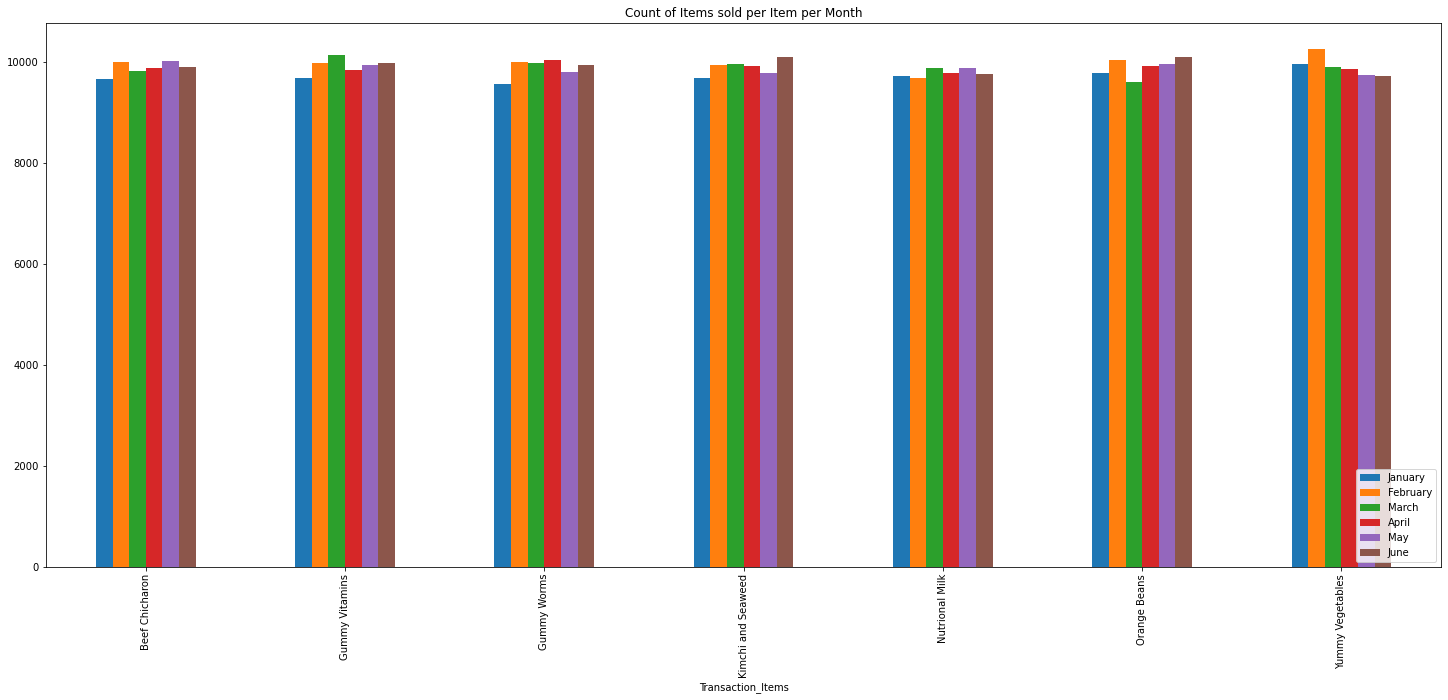

In [46]:
table1_bargraph = table1_df7.plot.bar(x="Transaction_Items", y = ["January", "February", "March", "April", "May", "June"],figsize = (25,10), title="Count of Items sold per Item per Month")
table1_bargraph.legend(loc=4,fontsize="medium")

Text(0.5, 1.0, 'Beef Chicharon Orders By Month')

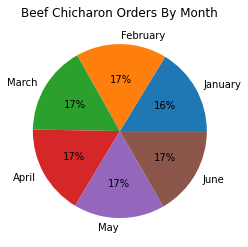

In [47]:
Beef_Chicharon = [9665, 10001, 9816, 9890, 10028, 9902]
Labels = ["January", "February", "March", "April", "May", "June"]

Table1_BeefChicharonPieChart = plt.pie(Beef_Chicharon, labels=Labels, autopct='%1.0f%%')
plt.title("Beef Chicharon Orders By Month")


Text(0.5, 1.0, 'Gummy Vitamins Orders By Month')

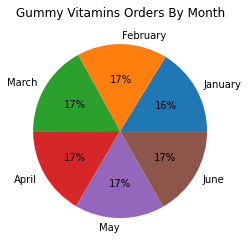

In [48]:
Gummy_Vitamins = [9681, 9980, 10145, 9842, 9948, 9980]
Labels = ["January", "February", "March", "April", "May", "June"]

Table1_GummyVitaminsPieChart = plt.pie(Gummy_Vitamins, labels=Labels, autopct='%1.0f%%')
plt.title("Gummy Vitamins Orders By Month")

Text(0.5, 1.0, 'Gummy Worms Orders By Month')

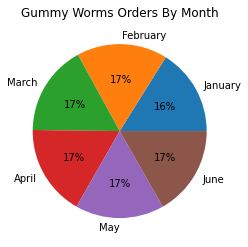

In [49]:
Gummy_Worms = [9559, 9996, 9986, 10043, 9801, 9934]
Labels = ["January", "February", "March", "April", "May", "June"]

Table1_GummyWormsPieChart = plt.pie(Gummy_Worms, labels=Labels, autopct='%1.0f%%')
plt.title("Gummy Worms Orders By Month")

Text(0.5, 1.0, 'Kimchi & Seaweed Orders By Month')

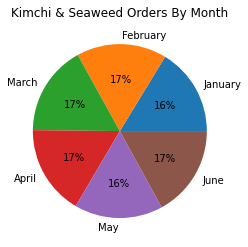

In [50]:
Kimchi_Seaweed = [9676, 9949, 9967, 9921, 9773, 10104]
Labels = ["January", "February", "March", "April", "May", "June"]

Table1_KimchiSeaweedPieChart = plt.pie(Kimchi_Seaweed, labels=Labels, autopct='%1.0f%%')
plt.title("Kimchi & Seaweed Orders By Month")

Text(0.5, 1.0, 'Nutritional Milk Orders By Month')

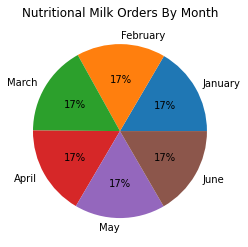

In [51]:
Nutritional_Milk = [9727, 9691, 9876, 9786, 9881, 9767]
Labels = ["January", "February", "March", "April", "May", "June"]

Table1_NutritionalMilkPieChart = plt.pie(Nutritional_Milk, labels=Labels, autopct='%1.0f%%')
plt.title("Nutritional Milk Orders By Month")

Text(0.5, 1.0, 'Orange Beans Orders By Month')

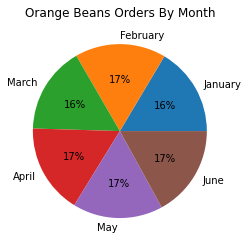

In [52]:
Orange_Beans = [9774, 10037, 9611, 9914, 9964, 10106]
Labels = ["January", "February", "March", "April", "May", "June"]

Table1_OrangeBeansChart = plt.pie(Orange_Beans, labels=Labels, autopct='%1.0f%%')
plt.title("Orange Beans Orders By Month")

Text(0.5, 1.0, 'Yummy Vegetables Orders By Month')

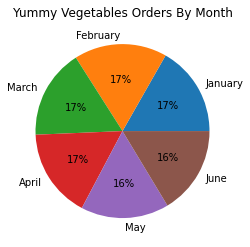

In [53]:
Yummy_Vegetables = [9959, 10256, 9896, 9861, 9735, 9722]
Labels = ["January", "February", "March", "April", "May", "June"]

Table1_YummyVegetablesChart = plt.pie(Yummy_Vegetables, labels=Labels, autopct='%1.0f%%')
plt.title("Yummy Vegetables Orders By Month")

In [55]:
table2_df7 = table2_df6
table2_df8 = table2_df7.reset_index()
table2_df8.columns = ["Transaction_Items","January", "February", "March", "April", "May", "June"]
table2_df8["Total Sale Value"] = [77033298,89094000,8897850,47452610,116868720,11821794,29714500]
table2_df8

,Transaction_Items,January,February,March,April,May,June,Total Sale Value
0,Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698,77033298
1,Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000,89094000
2,Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100,8897850
3,Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096,47452610
4,Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330,116868720
5,Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094,11821794
6,Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000,29714500


Text(0.5, 1.0, 'Total Sale Value per Transactional Item from January to June')

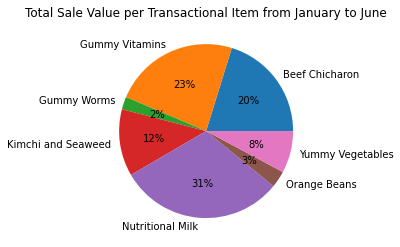

In [56]:
Total_Sale_Value = [77033298,89094000,8897850,47452610,116868720,11821794,29714500]
Labels = ["Beef Chicharon", "Gummy Vitamins", "Gummy Worms", "Kimchi and Seaweed", "Nutritional Milk", "Orange Beans", "Yummy Vegetables"]

Table2_TotalSaleValuePieChart = plt.pie(Total_Sale_Value, labels=Labels, autopct='%1.0f%%')
plt.title("Total Sale Value per Transactional Item from January to June")